**Simple Linear Regression**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/3D Printing.csv')

In [3]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


<ipython-input-6-2c28667ceb5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(),annot = True , cmap = 'cool')


<Axes: >

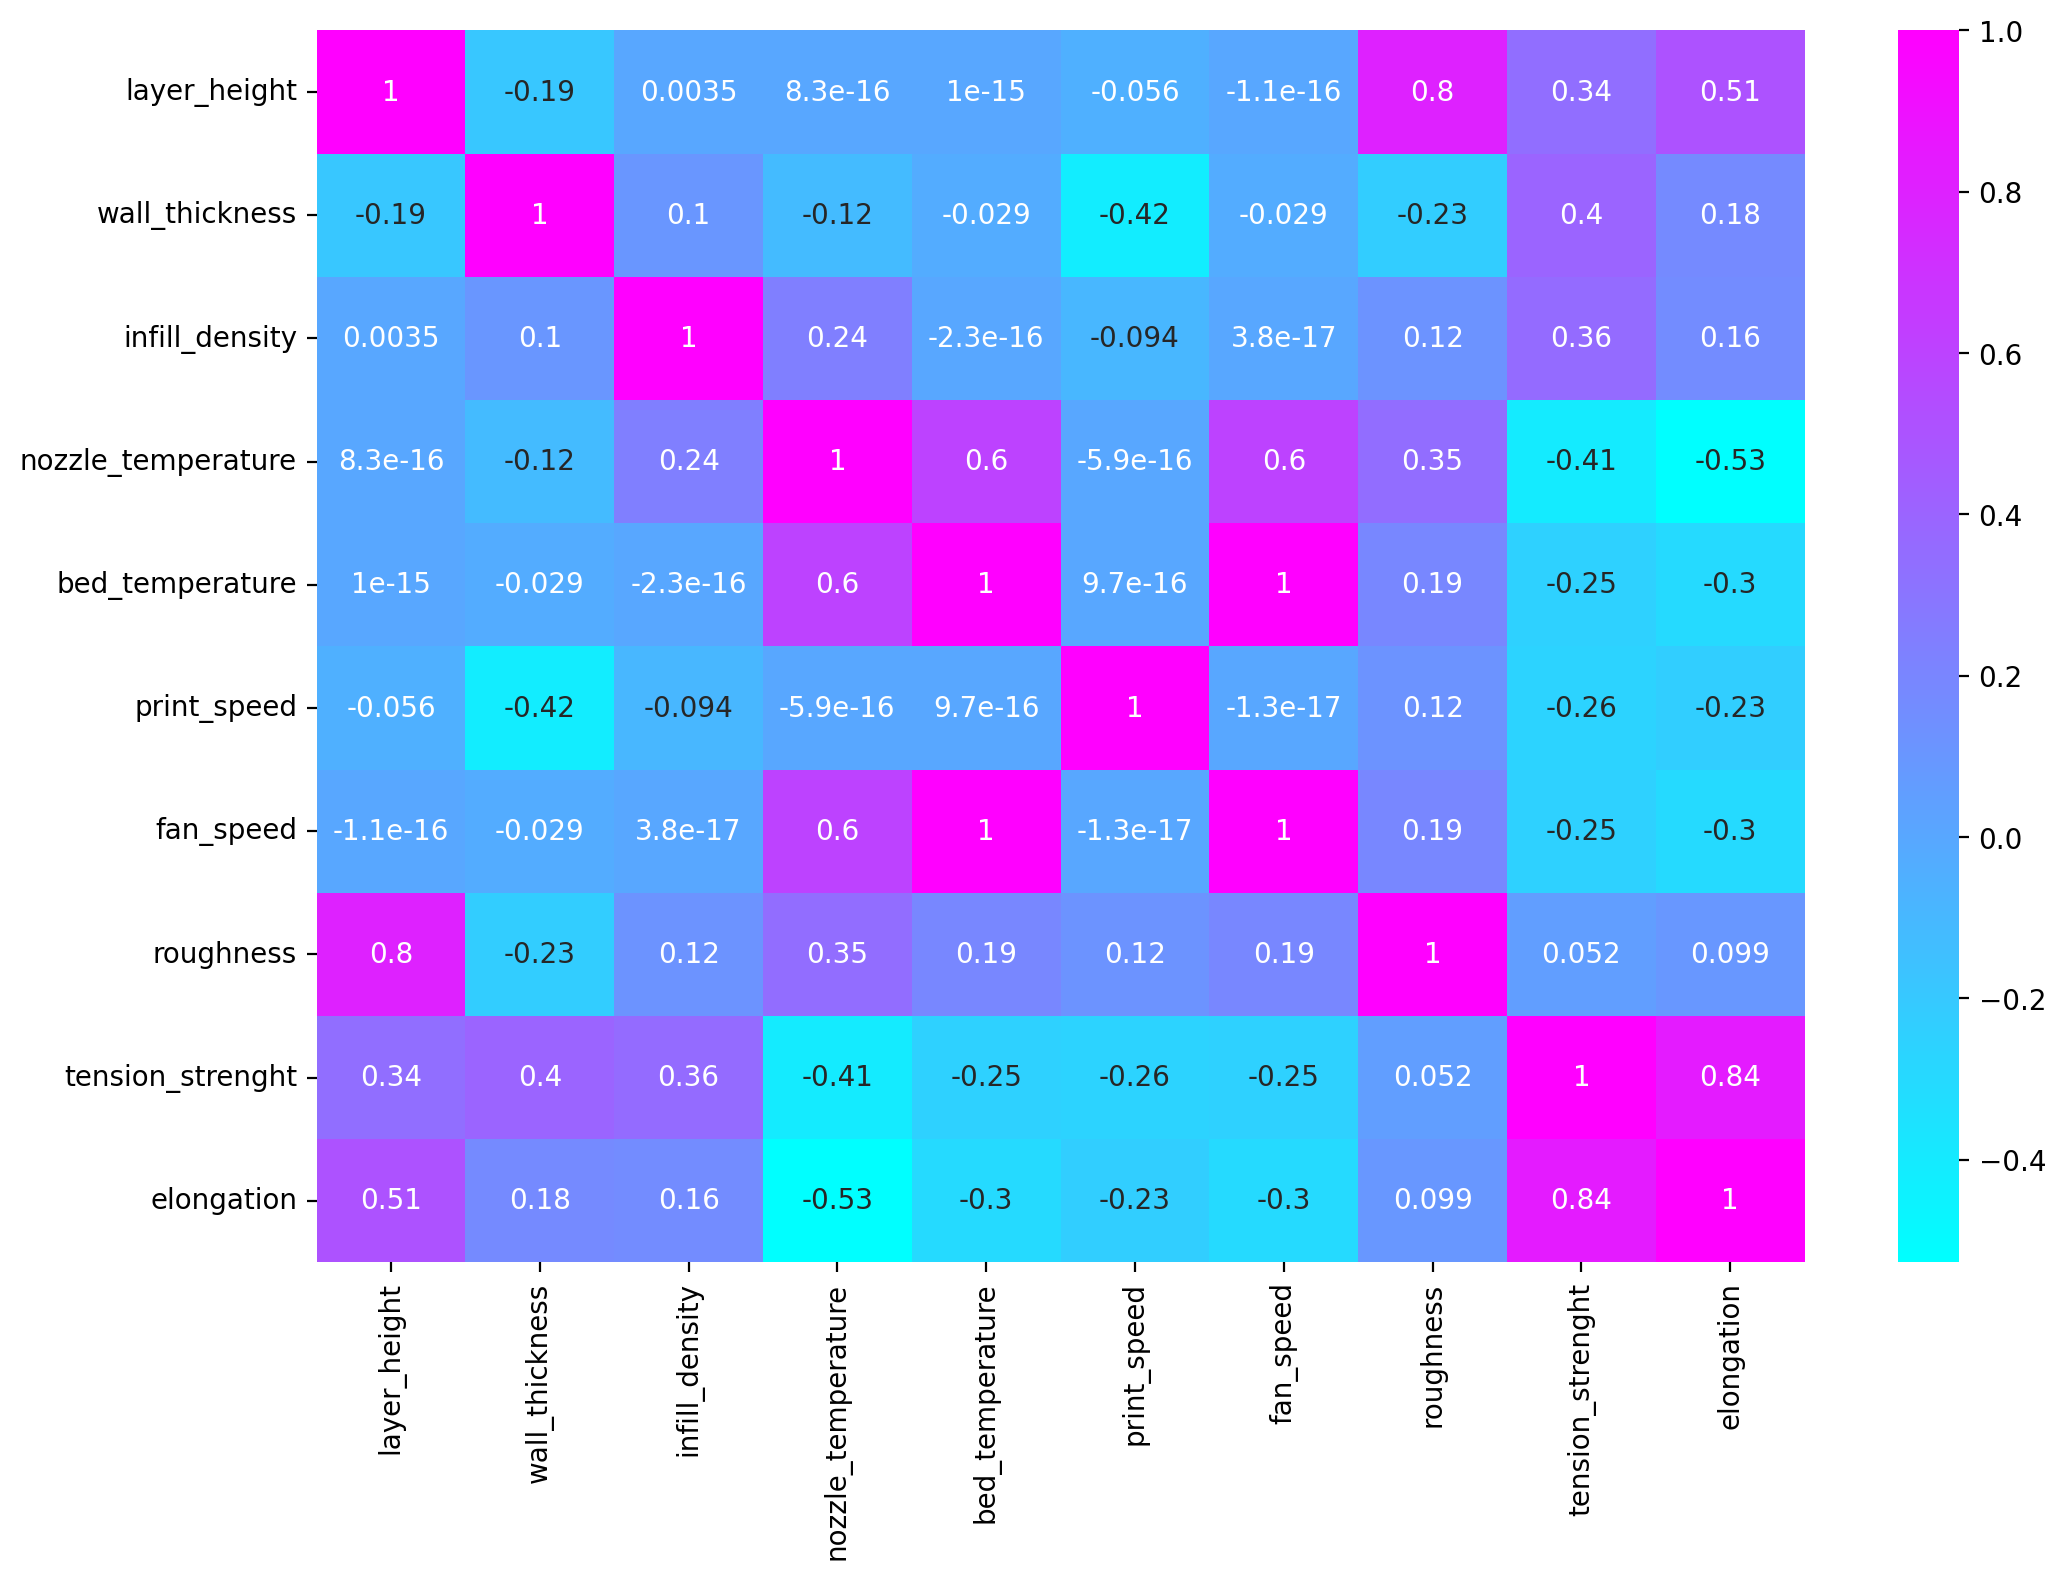

In [6]:
plt.figure(figsize = (12,8),dpi = 200)
sns.heatmap(data = df.corr(),annot = True , cmap = 'cool')

<Axes: xlabel='layer_height', ylabel='roughness'>

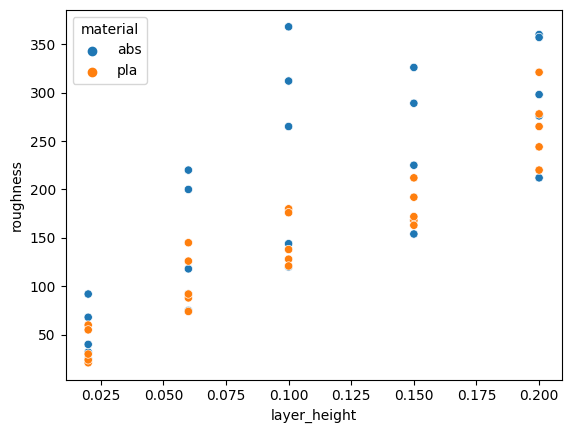

In [7]:
sns.scatterplot(data = df, x = 'layer_height', y = 'roughness', hue = 'material')

In [8]:
X = df[['layer_height']]
y = df['roughness']

In [10]:
X.head()

,layer_height
0,0.02
1,0.02
2,0.02
3,0.02
4,0.02


In [11]:
y.head()

0    25
1    32
2    40
3    68
4    92
Name: roughness, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
MAE = mean_absolute_error(y_pred,y_test)

In [54]:
MSE = mean_squared_error(y_pred,y_test)

In [55]:
RMSE = np.sqrt(MSE)

In [56]:
MAE

37.32902648311624

In [57]:
MSE

2811.9706875529873

In [58]:
RMSE

53.028017948561754

**Multiple Linear Regression**

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/3D Printing.csv')

In [32]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [34]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


<ipython-input-35-feff4c7d740e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')


<Axes: >

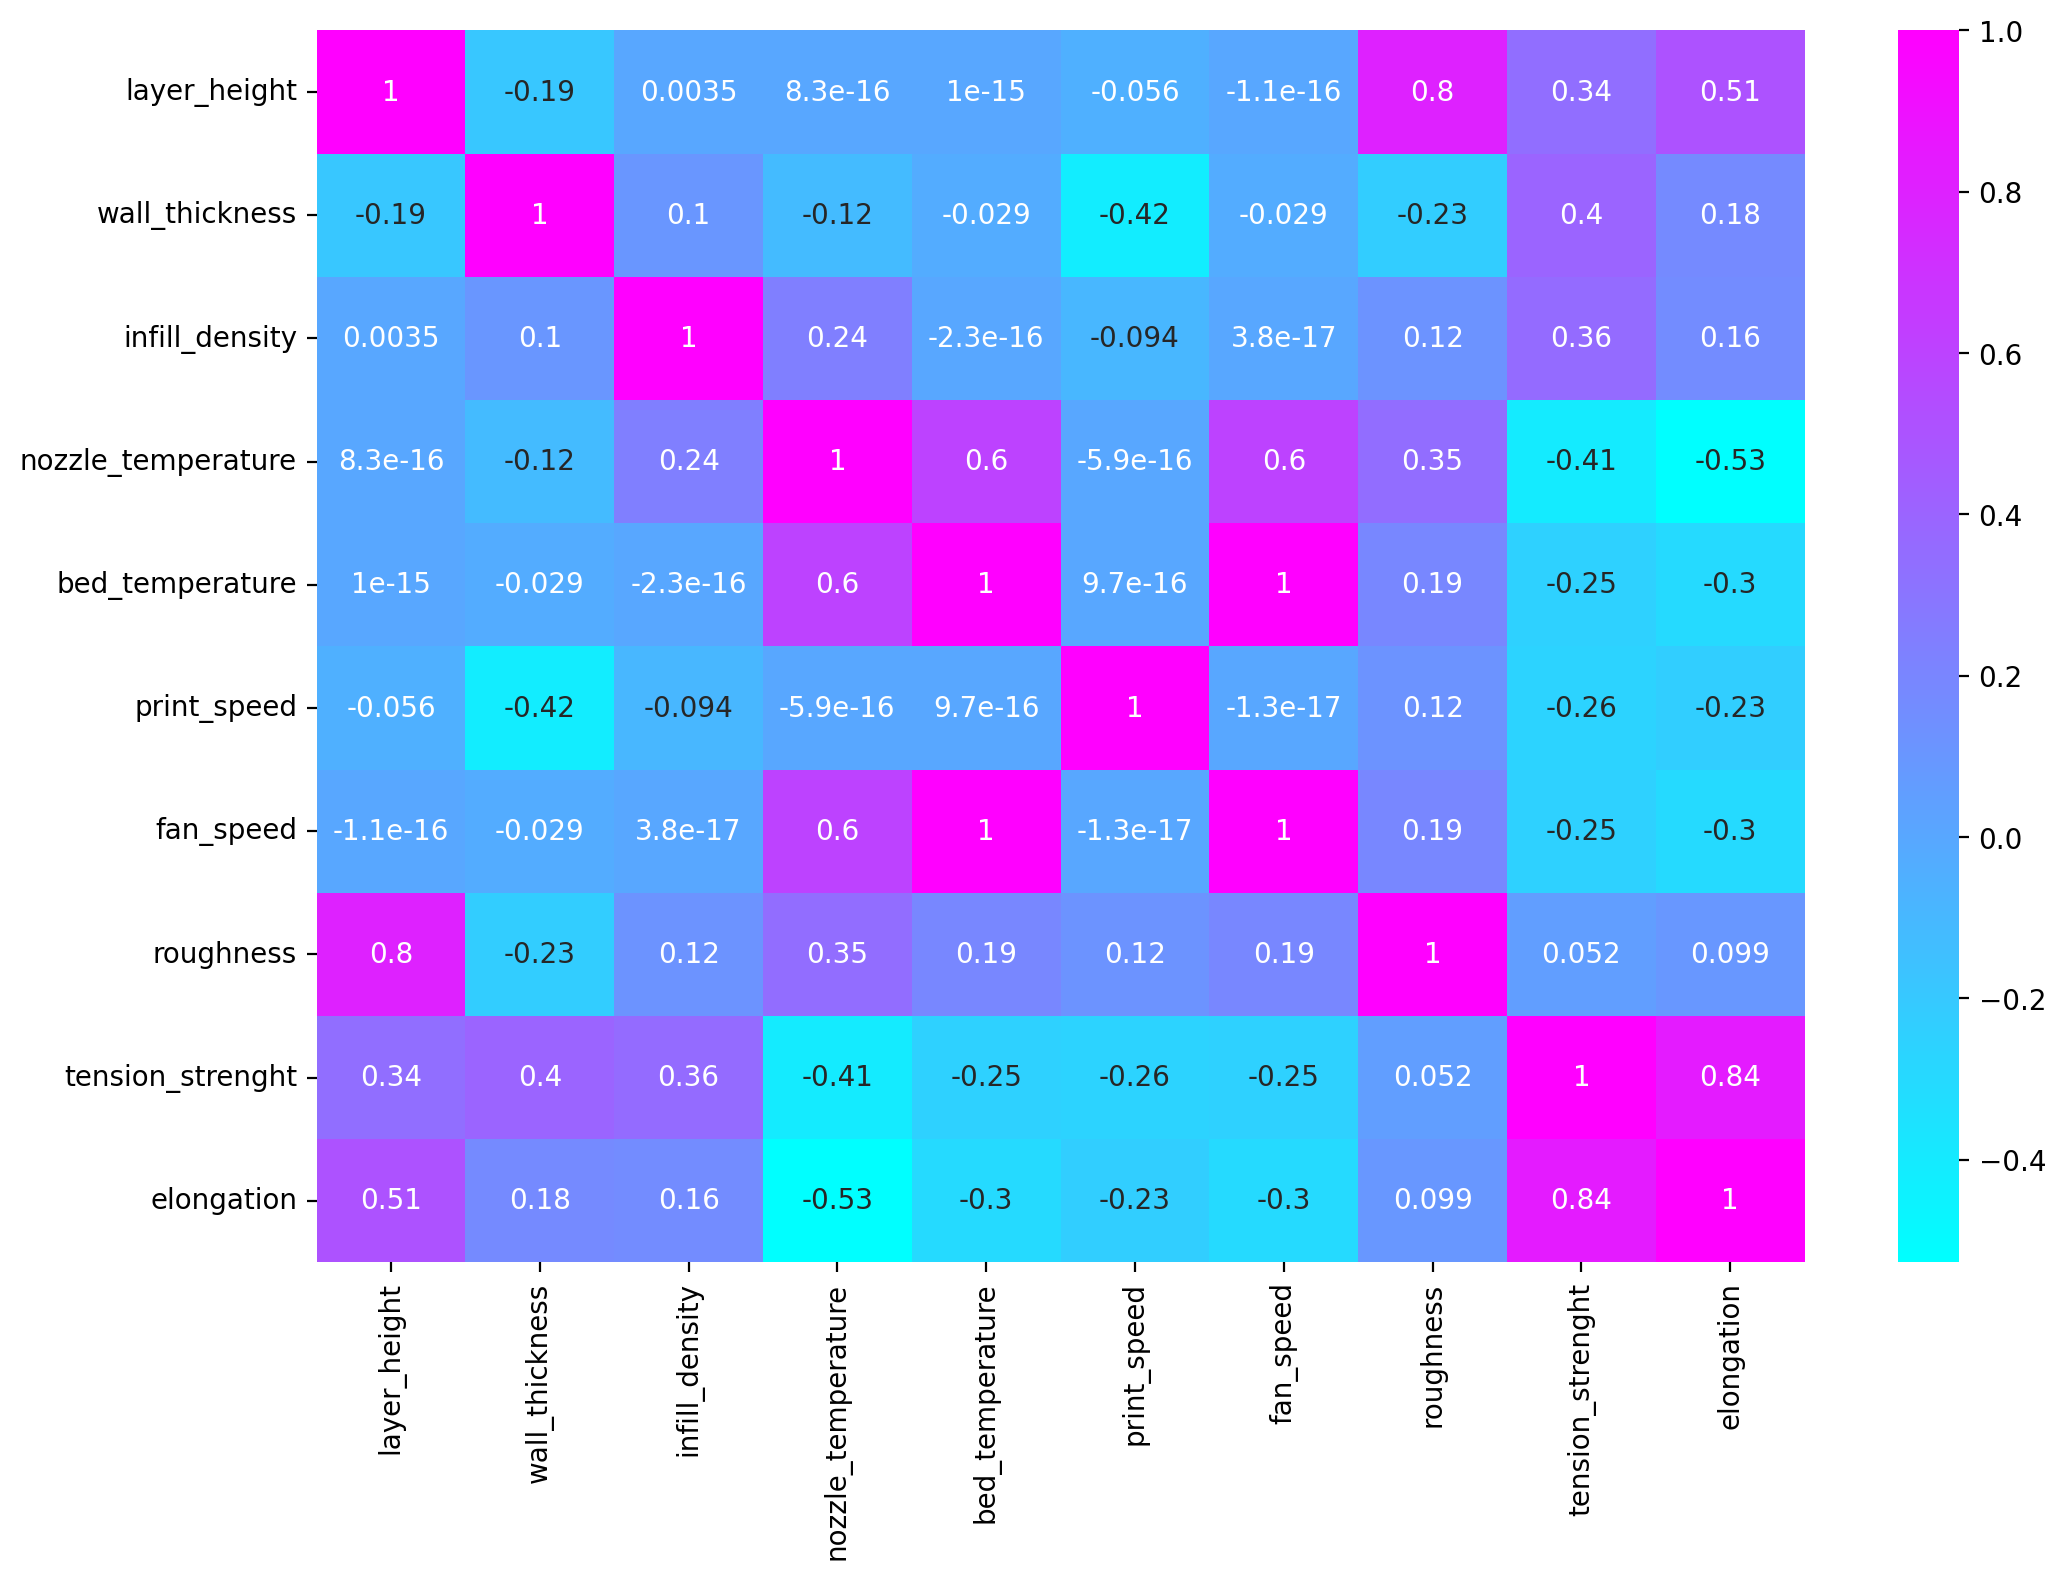

In [35]:
plt.figure(figsize = (12,8), dpi =200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')

In [70]:
X = df[['elongation','layer_height','infill_density']]
y = df['tension_strenght']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [73]:
scaler = StandardScaler()

In [74]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [83]:
MAE = mean_absolute_error(y_pred,y_test)

In [84]:
MSE = mean_squared_error(y_pred,y_test)

In [85]:
RMSE = np.sqrt(MSE)

In [86]:
MAE

3.6249170654832503

In [87]:
MSE

16.395025884263028

In [88]:
RMSE

4.049077164523174

**Polynomial Linear Regression**

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/3D Printing.csv')

In [91]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [93]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


<ipython-input-94-4facf1bd3217>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')


<Axes: >

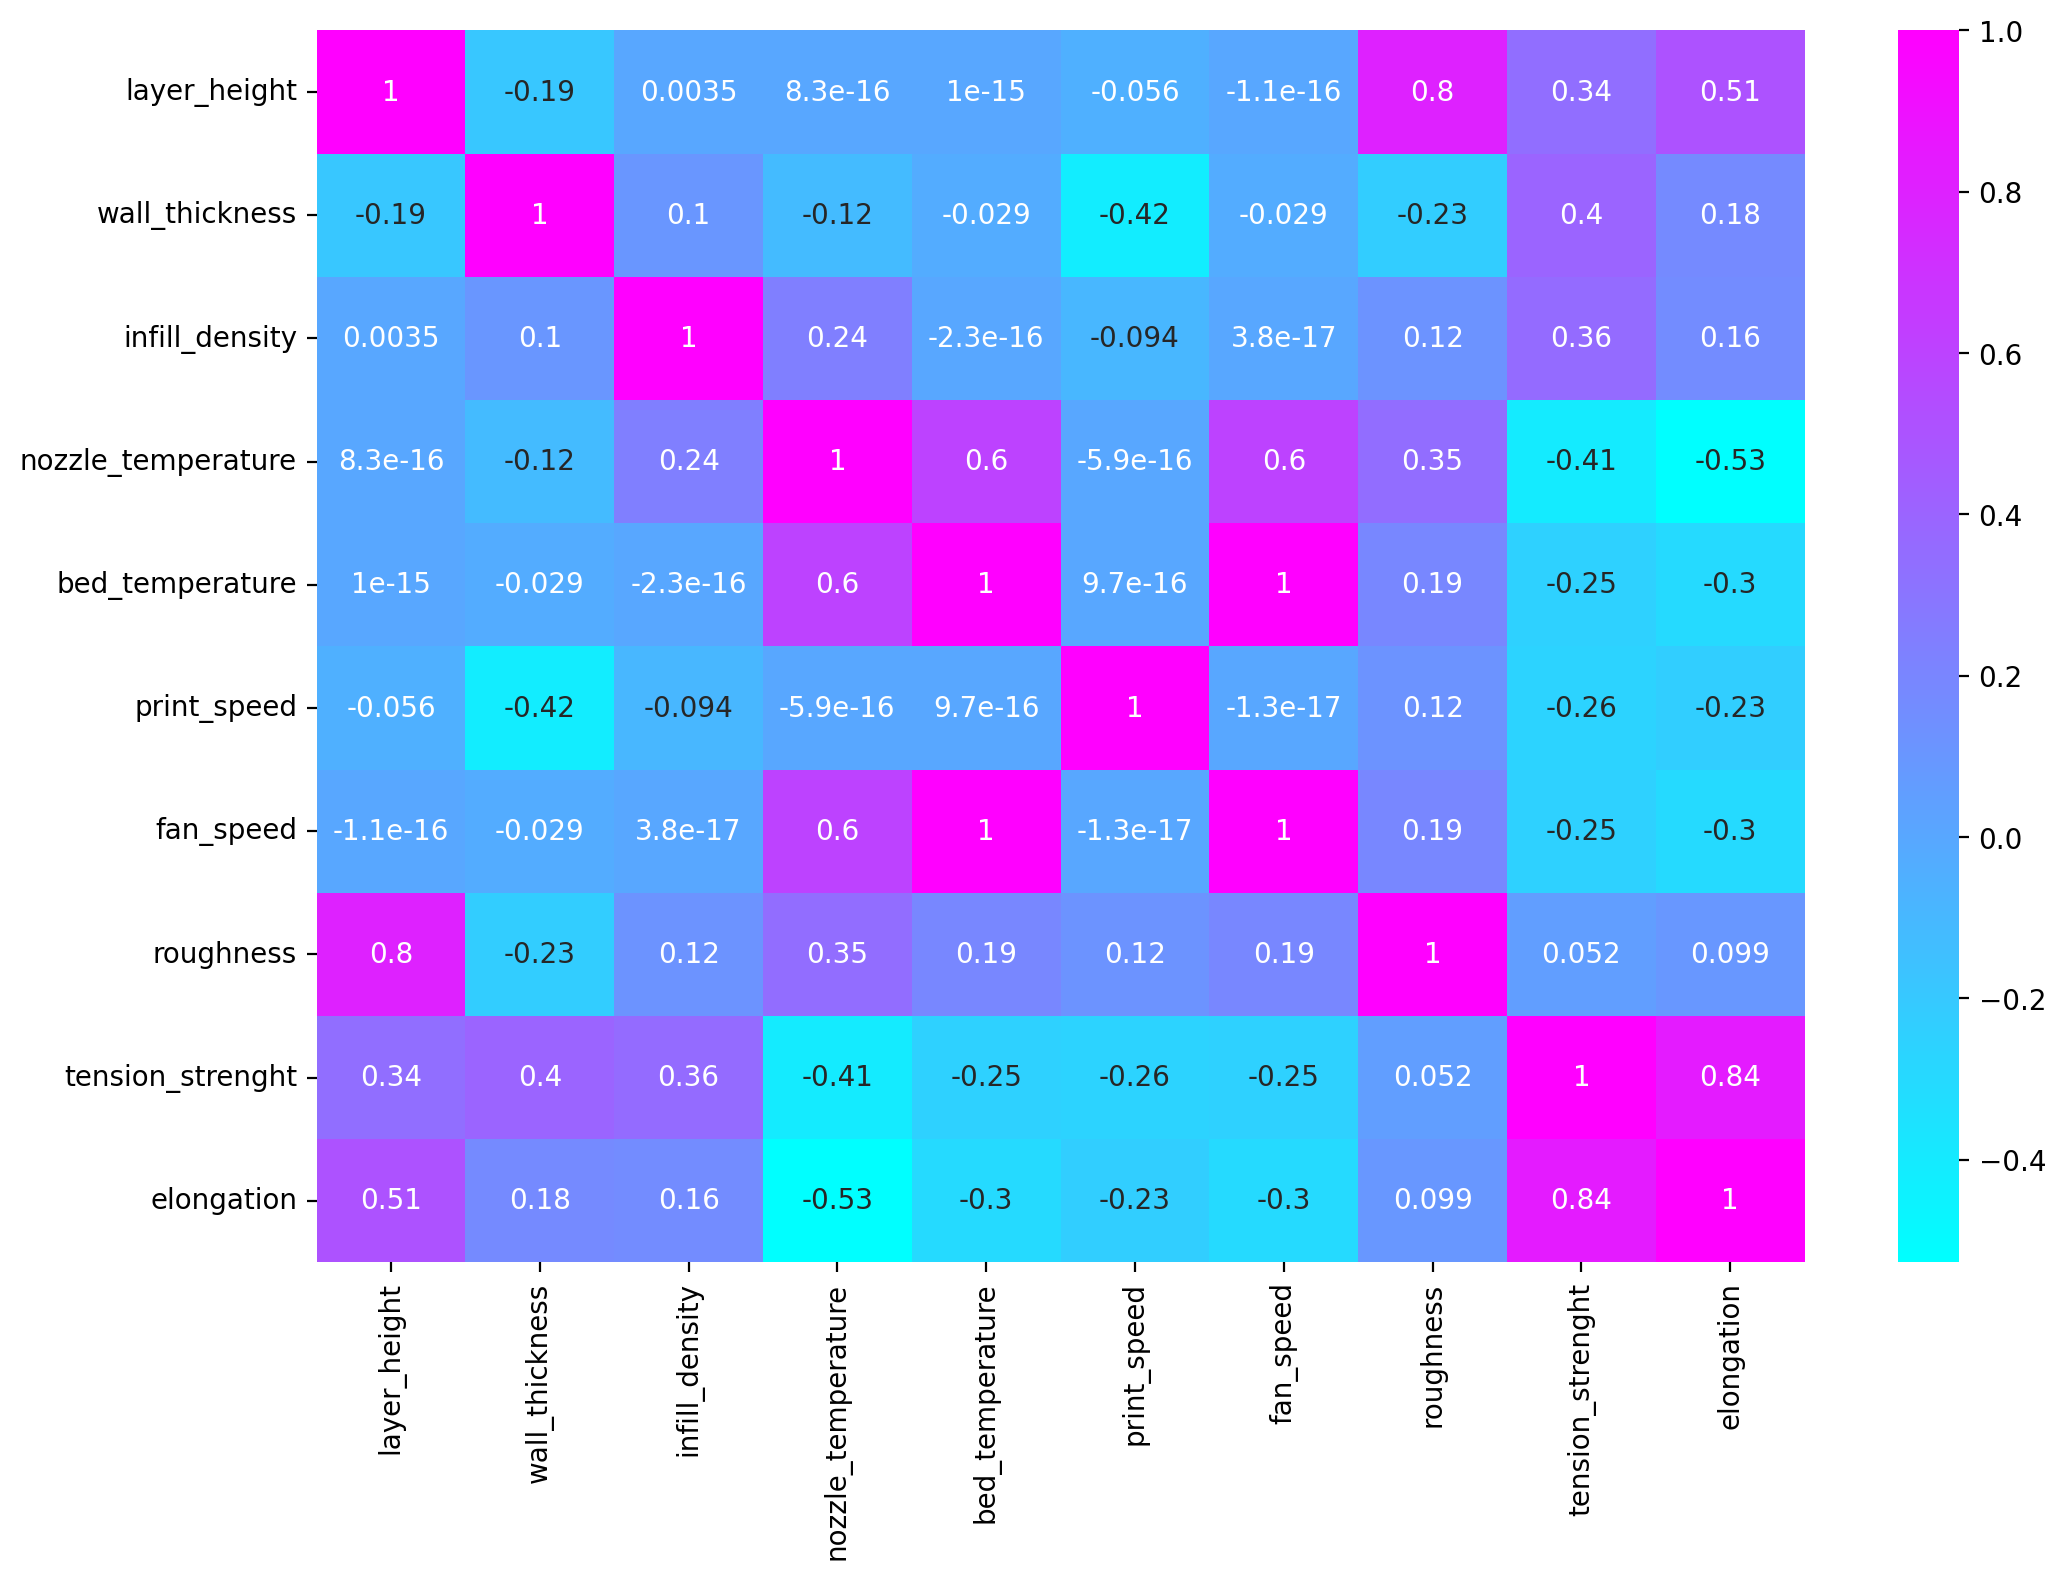

In [94]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')

In [95]:
X = df[['elongation','infill_density','wall_thickness','layer_height']]
y = df['tension_strenght']

In [96]:
from sklearn.preprocessing import PolynomialFeatures

In [97]:
poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [98]:
poly_features = poly_converter.fit_transform(X)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)

In [105]:
X_train = scaler.fit_transform(X_train)

In [107]:
X_test = scaler.transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression()

In [111]:
model.fit(X_train,y_train)

LinearRegression()

In [112]:
y_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [114]:
MAE = mean_absolute_error(y_pred,y_test)

In [115]:
MSE = mean_squared_error(y_pred,y_test)

In [116]:
RMSE = np.sqrt(MSE)

In [117]:
MAE

10.285650605845325

In [118]:
MSE

171.61208523336518

In [119]:
RMSE

13.10007958881797

In [126]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,11):
  X = df[['elongation','infill_density','wall_thickness','layer_height']]
  y = df['tension_strenght']
  poly_conv = PolynomialFeatures(degree = d, include_bias = False)
  poly_feat = poly_conv.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.20, random_state=101)
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)
  model = LinearRegression()
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  test_rmse = np.sqrt(mean_squared_error(y_pred,y_test))
  train_rmse = np.sqrt(mean_squared_error(y_pred_train,y_train))
  test_rmse_errors.append(test_rmse)
  train_rmse_errors.append(train_rmse)
test_rmse_errors

[4.637584842421197,
 5.821955463490832,
 17.628235642702368,
 62.9174868003611,
 57.01035557935389,
 51.63760372220098,
 47.08570482498389,
 43.7003629887651,
 41.52580738404785,
 40.44494782474865]

In [127]:
train_rmse_errors

[4.006102485789816,
 2.6558203422805473,
 1.7003416274627459,
 1.7941577812493817e-13,
 1.298047767788828e-13,
 7.09565066888343e-14,
 7.725416535398003e-14,
 2.425377678660081e-13,
 1.1422299079152056e-13,
 2.385145226114259e-13]

Text(0.5, 0, 'degree')

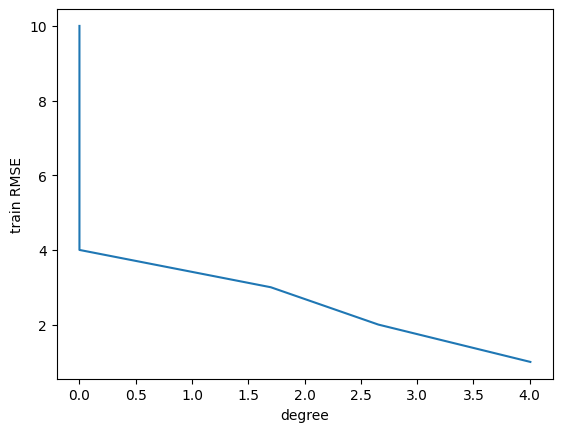

In [128]:
plt.plot(train_rmse_errors,range(1,11))
plt.ylabel('train RMSE')
plt.xlabel('degree')

Text(0.5, 0, 'degree')

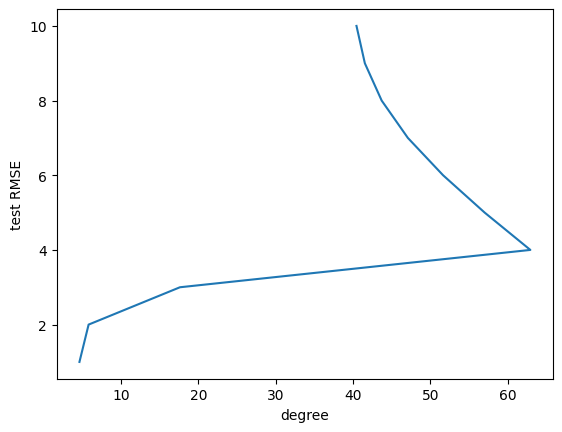

In [129]:
plt.plot(test_rmse_errors,range(1,11))
plt.ylabel('test RMSE')
plt.xlabel('degree')

**Logistic Regression**

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/3D Printing.csv')

In [132]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [134]:
df.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [135]:
df['infill_pattern'].replace(['grid','honeycomb'],[0,1],inplace = True)
df['material'].replace(['abs','pla'],[0,1],inplace = True)

In [136]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


<Axes: >

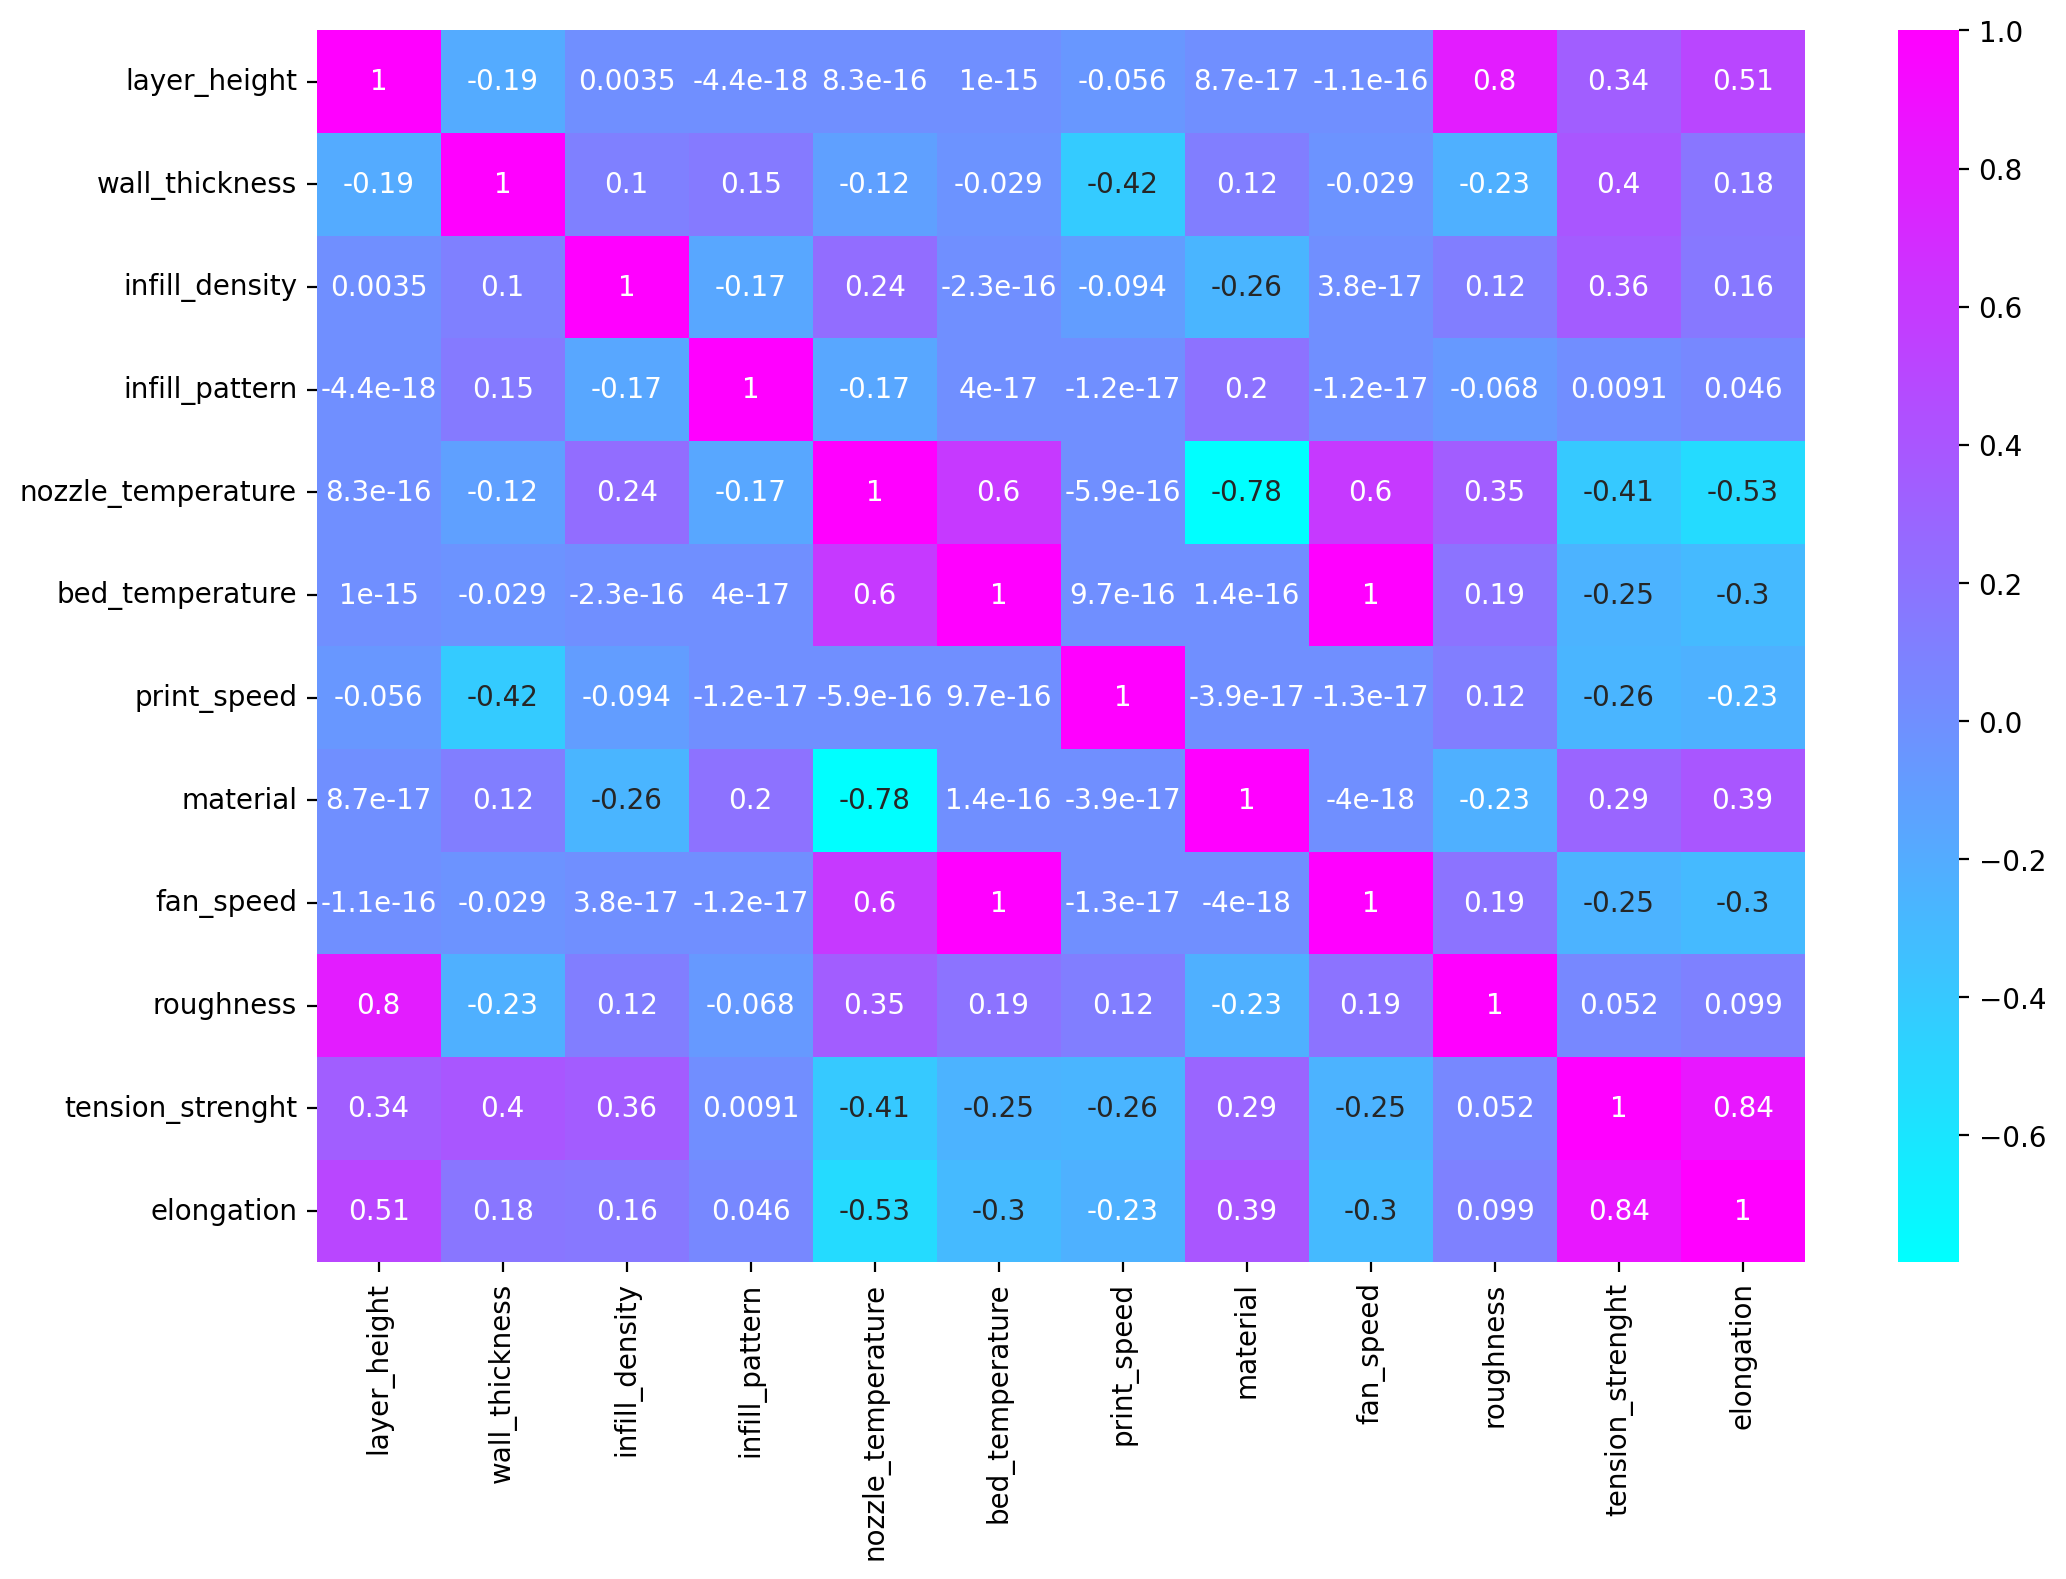

In [138]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')

In [139]:
X = df[['elongation','tension_strenght','roughness','nozzle_temperature','infill_pattern','infill_density','wall_thickness']]
y = df['material']

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [145]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
model = LogisticRegression()

In [149]:
model.fit(X_train,y_train)

LogisticRegression()

In [150]:
y_pred = model.predict(X_test)

In [151]:
from sklearn.metrics import classification_report

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [163]:
from sklearn.metrics import confusion_matrix

In [165]:
cm = confusion_matrix(y_test,y_pred)

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay

In [170]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

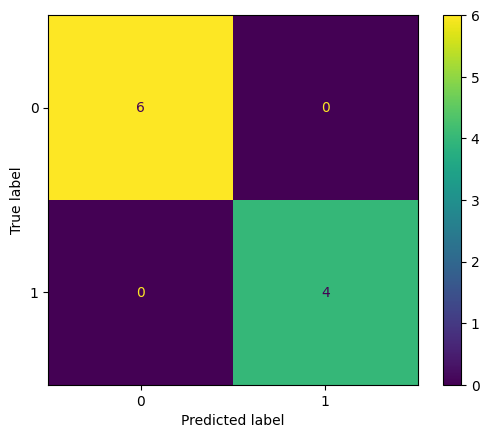

In [173]:
disp.plot()

**Decision Tree**

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/diabetes_dataset.csv')

In [176]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [179]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

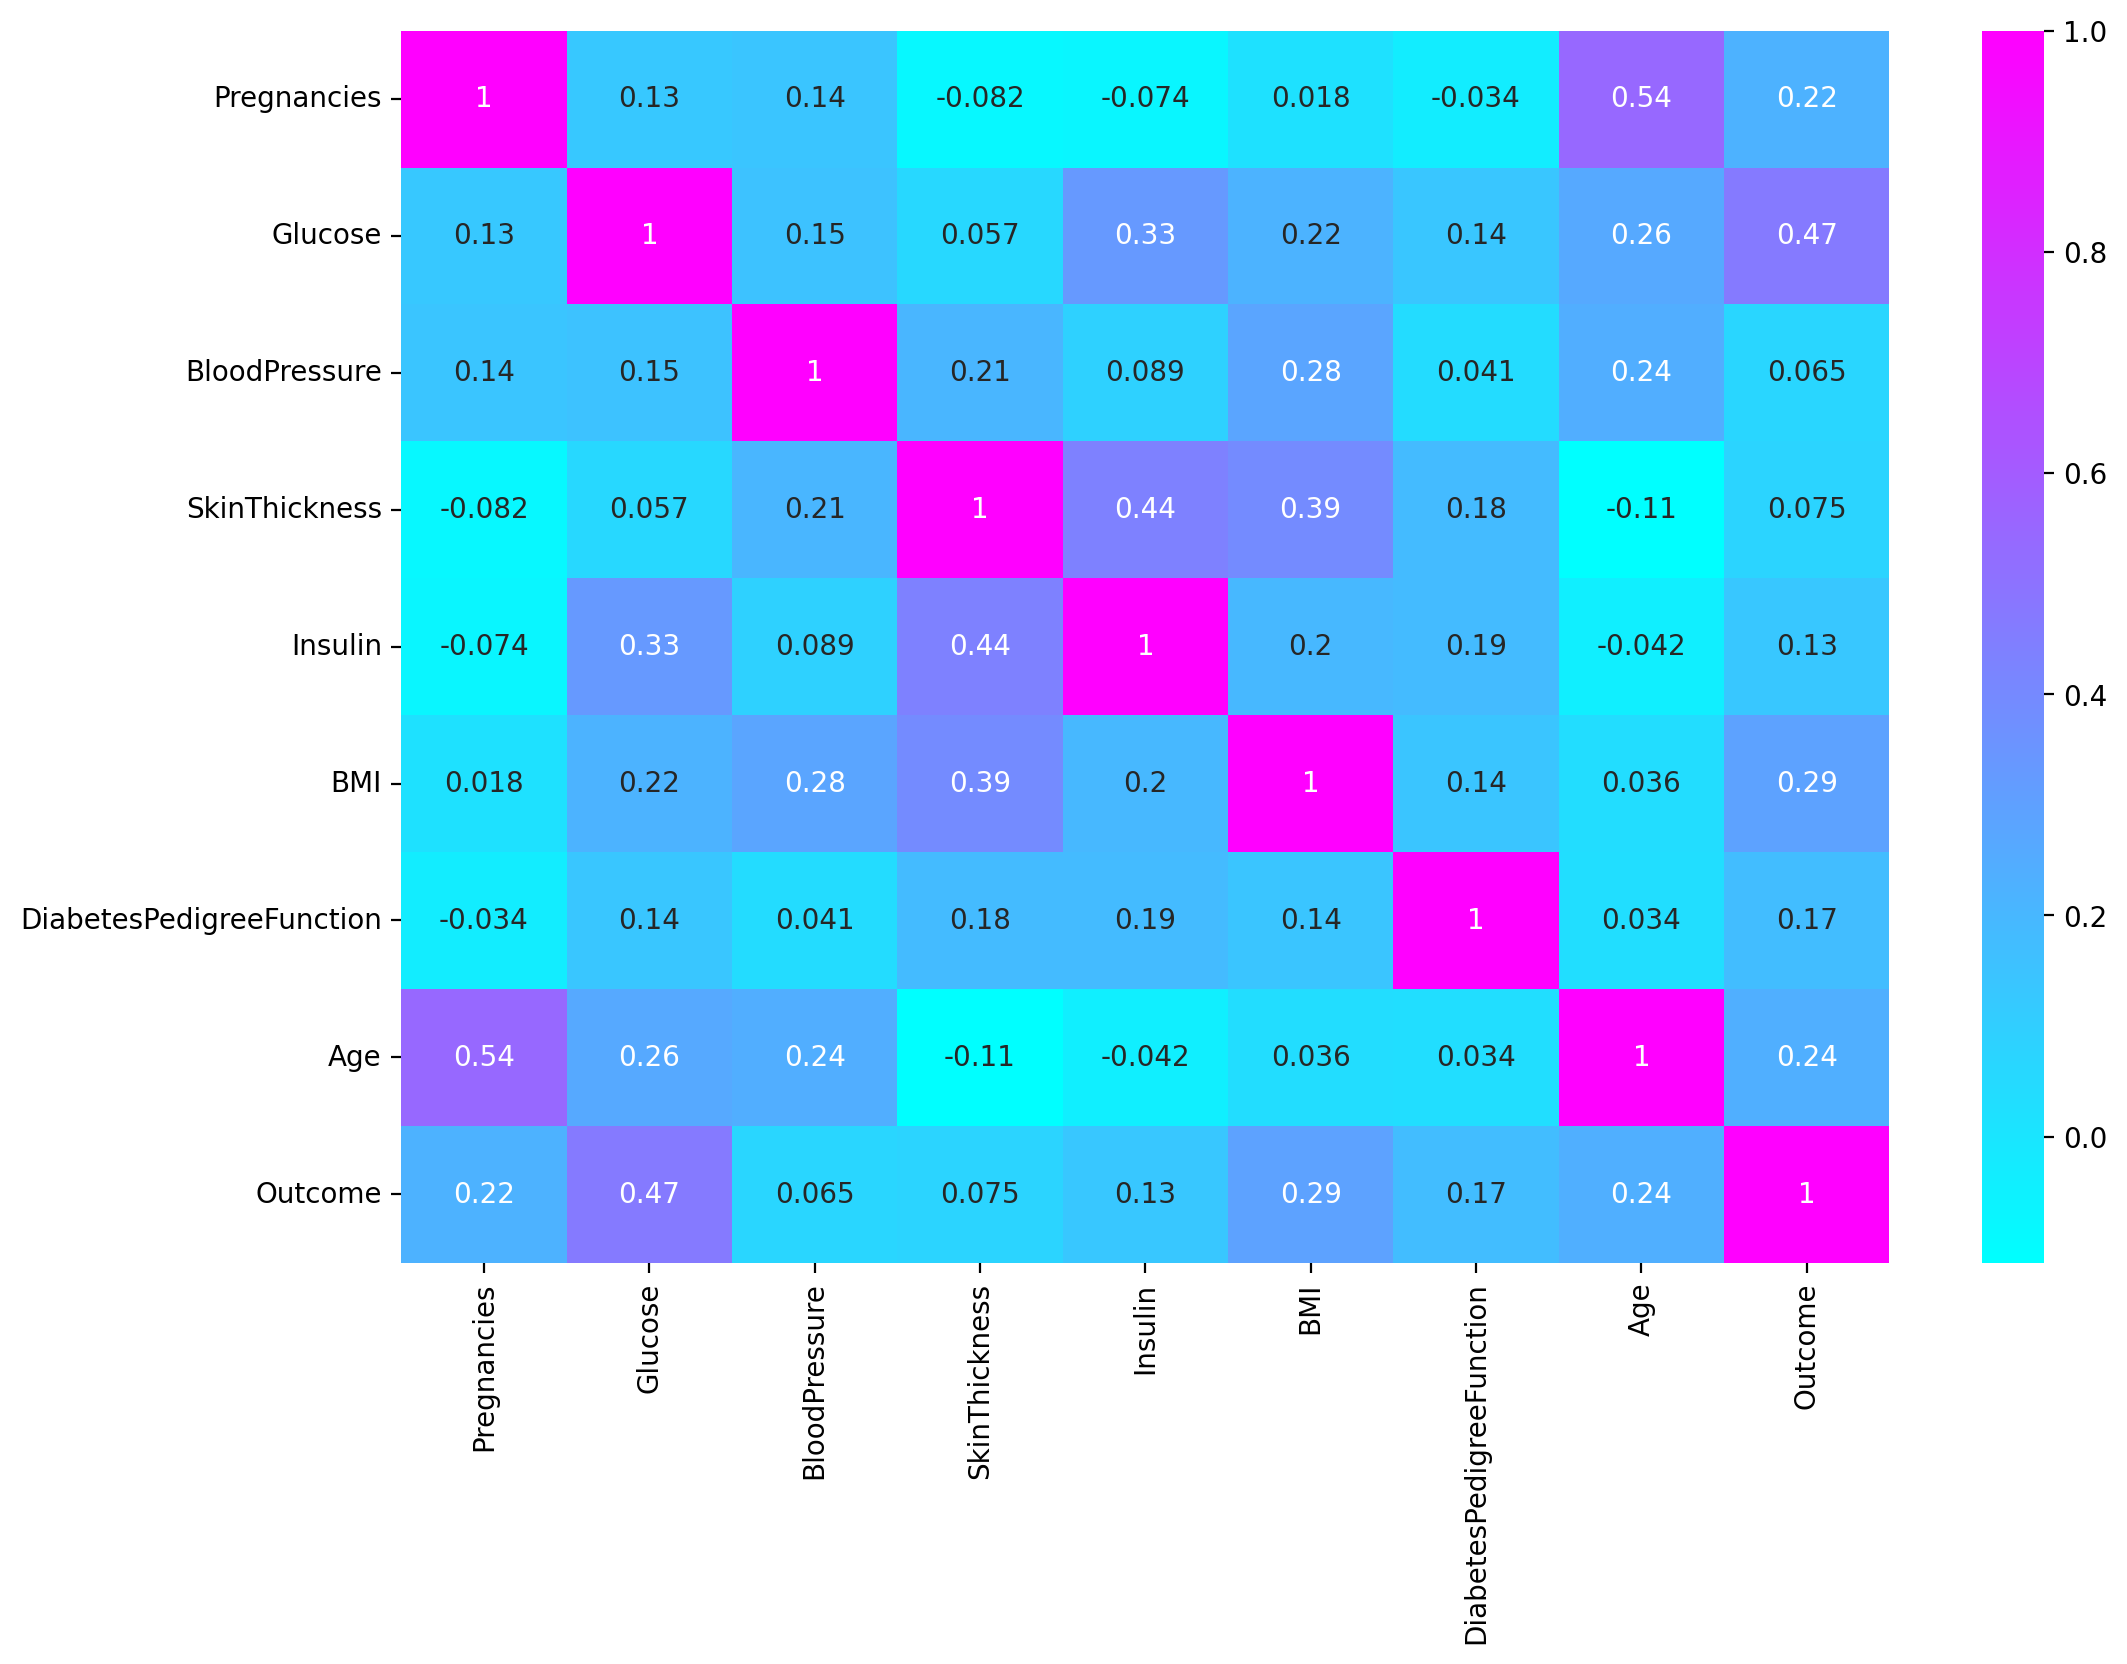

In [180]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')

In [181]:
X = df[['Pregnancies','Glucose','BMI','Age','DiabetesPedigreeFunction','Insulin']]
y = df['Outcome']

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
scaler = StandardScaler()

In [189]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [192]:
model = DecisionTreeClassifier()

In [194]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [195]:
y_pred = model.predict(X_test)

In [196]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [197]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       149
           1       0.59      0.59      0.59        82

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



In [200]:
cm = confusion_matrix(y_pred,y_test)

In [201]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

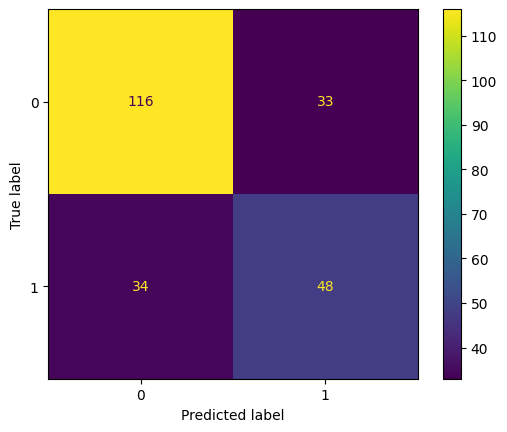

In [202]:
disp.plot()

In [204]:
from sklearn.tree import DecisionTreeRegressor

In [205]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

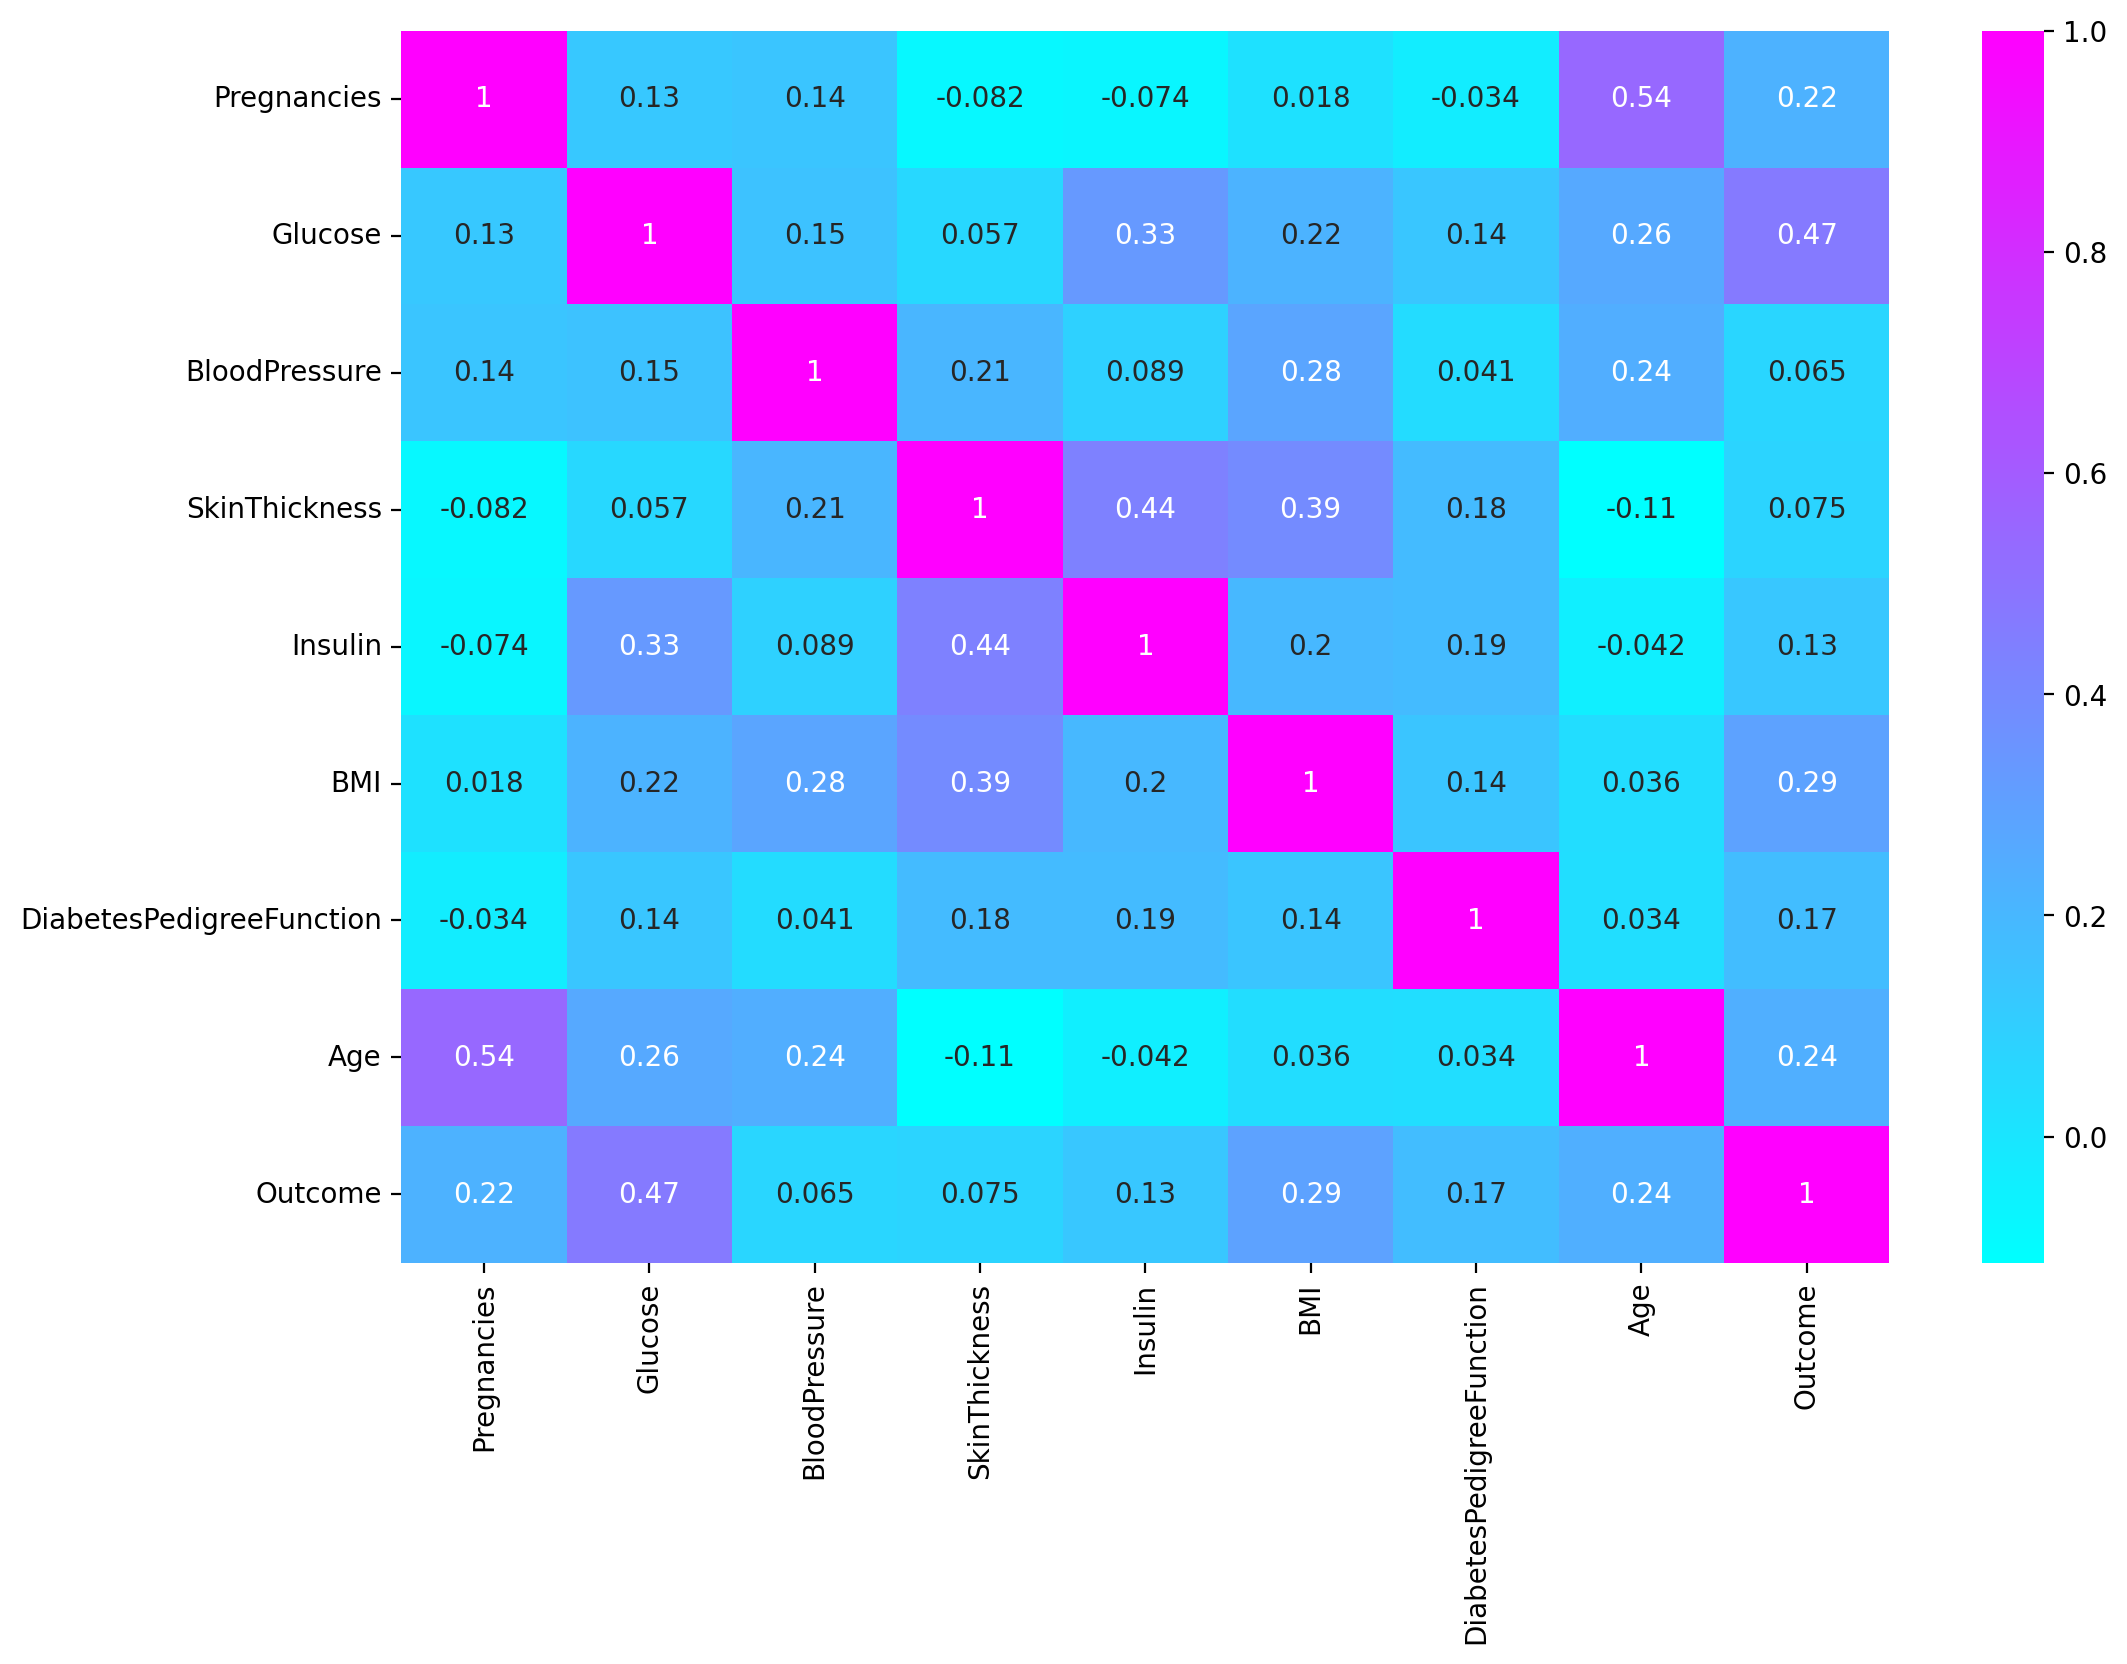

In [206]:
plt.figure(figsize = (12,8), dpi = 200)
sns.heatmap(data = df.corr(), annot = True, cmap = 'cool')

In [207]:
X = df[['Insulin','BMI','Age','Outcome','BloodPressure','Pregnancies']]
y = df['Glucose']

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()

In [212]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
model = DecisionTreeRegressor()

In [214]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [215]:
y_pred = model.predict(X_test)

In [216]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [217]:
MAE = mean_absolute_error(y_pred,y_test)

In [218]:
MSE = mean_squared_error(y_pred,y_test)

In [219]:
RMSE = np.sqrt(MSE)

In [220]:
MAE

26.90909090909091

In [221]:
MSE

1251.7142857142858

In [222]:
RMSE

35.379574413979114